# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Alifya Meirza
- **Email:** alifyameirza15@gmail.com
- **ID Dicoding:** alifyameirza

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1:
Apakah ada korelasi antara suhu ("temp") dan kelembaban udara ("hum") dengan jumlah sewa sepeda ("count")?

- Pertanyaan 2:
Apakah ada perbedaan dalam jumlah sewa sepeda antara hari kerja ("workingday") dan hari libur ("holiday")?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**1. Memanggil dan membaca data day.csv**

In [ ]:
data_day_df = pd.read_csv("/content/day.csv")
data_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Pada bagian ini data akan di panggil dan menampilkan 5 data teratas

### Assessing Data

**2. Untuk mendapatkan informasi mengenai data yaitu jumlah dan tipe data**

In [ ]:
data_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**3. Mengecek apakah ada data yang kosong/missing value**

In [ ]:
data_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah data yang diperoleh 0 untuk masing masing variabel yang artinya tidak ada missing value. Tetapi terdapat tipe data yang kurang tepat yaitu:
*   dteday seharusnya bertipe data datetime
*   season, yr, mnth, holiday, weekday, weathersit, dan workingday seharusnya bertipe data category

**4. Untuk melihat apakah ada data yang terduplikat**

In [ ]:
print("Jumlah duplikasi: ", data_day_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil yang diperoleh 0 yang artinya tidak ada data yang terduplikat

**5. untuk melihat deskripsi pada setiap kolom dalam dataset**

In [ ]:
data_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada bagian ini akan di tampilkan hasil ringkasan statistik deskriptif dari DataFrame untuk setiap kolom numerik dalam DataFrame, seperti rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum.

### Cleaning Data

**6. Merubah nama variabel untuk mempermudah di baca dan tipe data yang tidak sesuai**

In [ ]:
kolom_datetime = ['dteday']
kolom_category = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit','workingday']

for kolom in kolom_datetime:
  data_day_df[kolom] = pd.to_datetime(data_day_df[kolom])

for kolom in kolom_category:
  data_day_df[kolom] = data_day_df[kolom].astype('category')

data_day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [ ]:
data_day_df.rename(columns={'dteday': 'rental_date', 'yr': 'year', 'mnth': 'month', 'cnt': 'count'}, inplace=True)
data_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   rental_date  731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weathersit   731 non-null    category      
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  count        731 non-null    int64         
dtypes: categ

In [ ]:
data_day_df.to_csv("main_data.csv", index=False)

## Exploratory Data Analysis (EDA)

**Melihat Korelasi antar setiap data**

In [ ]:
data_day_df.corr(numeric_only=True)

,instant,temp,atemp,hum,windspeed,casual,registered,count
instant,1.000000,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
temp,0.150580,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.659623,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
count,0.628830,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


**Korelasi antara "temp" dengan "count"**

In [ ]:
data_day_df.groupby(by='temp').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                        
           max   min    mean   sum std
temp                                  
0.059130   981   981   981.0   981 NaN
0.096522   986   986   986.0   986 NaN
0.097391  1416  1416  1416.0  1416 NaN
0.107500  2368  2368  2368.0  2368 NaN
0.127500  1529  1529  1529.0  1529 NaN
...        ...   ...     ...   ...  ..
0.834167  5463  5463  5463.0  5463 NaN
0.838333  3846  3846  3846.0  3846 NaN
0.848333  3387  3387  3387.0  3387 NaN
0.849167  3285  3285  3285.0  3285 NaN
0.861667  4840  4840  4840.0  4840 NaN

[499 rows x 5 columns]

**Korelasi antara "hum" dengan "count"**

In [ ]:
data_day_df.groupby(by='hum').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                        
           max   min    mean   sum std
hum                                   
0.000000   623   623   623.0   623 NaN
0.187917  1635  1635  1635.0  1635 NaN
0.254167  6857  6857  6857.0  6857 NaN
0.275833  5169  5169  5169.0  5169 NaN
0.290000  5102  5102  5102.0  5102 NaN
...        ...   ...     ...   ...  ..
0.948261   605   605   605.0   605 NaN
0.949583  2594  2594  2594.0  2594 NaN
0.962500  1607  1607  1607.0  1607 NaN
0.970417   705   705   705.0   705 NaN
0.972500  2395  2395  2395.0  2395 NaN

[595 rows x 5 columns]

**Korelasi antara "holiday" dengan "count"**

In [ ]:
data_day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                         
          max   min         mean      sum          std
holiday                                               
0        8714    22  4527.104225  3214244  1929.013947
1        7403  1000  3735.000000    78435  2103.350660

**Korelasi antara "working day" dengan "count"**

In [ ]:
data_day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                        
             max  min         mean      sum          std
workingday                                              
0           8714  605  4330.168831  1000269  2052.141245
1           8362   22  4584.820000  2292410  1878.415583

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada korelasi antara suhu ("temp") dan kelembaban udara ("hum") dengan jumlah sewa sepeda ("cnt")?

**Menggunakan Scater Plot**

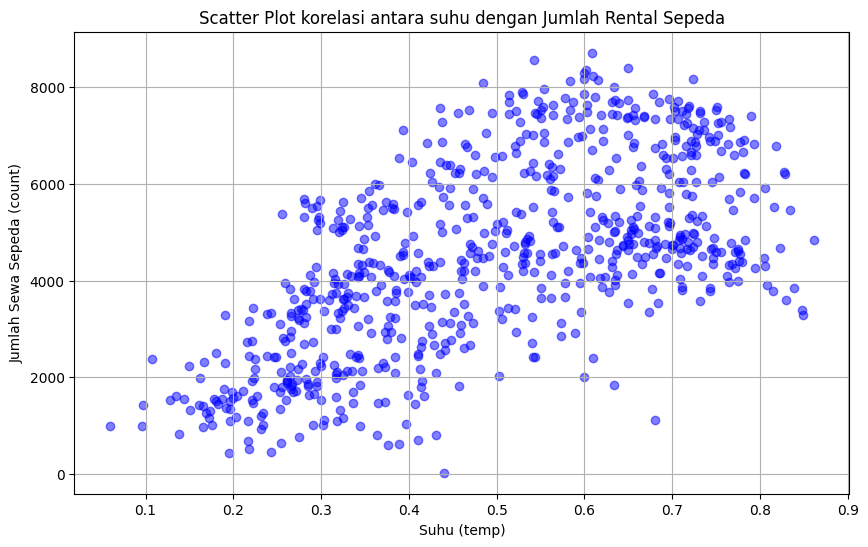

In [180]:
plt.figure(figsize=(10, 6))
plt.scatter(data_day_df['temp'], data_day_df['count'], color='blue', alpha=0.5)
plt.title('Scatter Plot korelasi antara suhu dengan Jumlah Rental Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Sewa Sepeda (count)')
plt.grid(True)
plt.show()

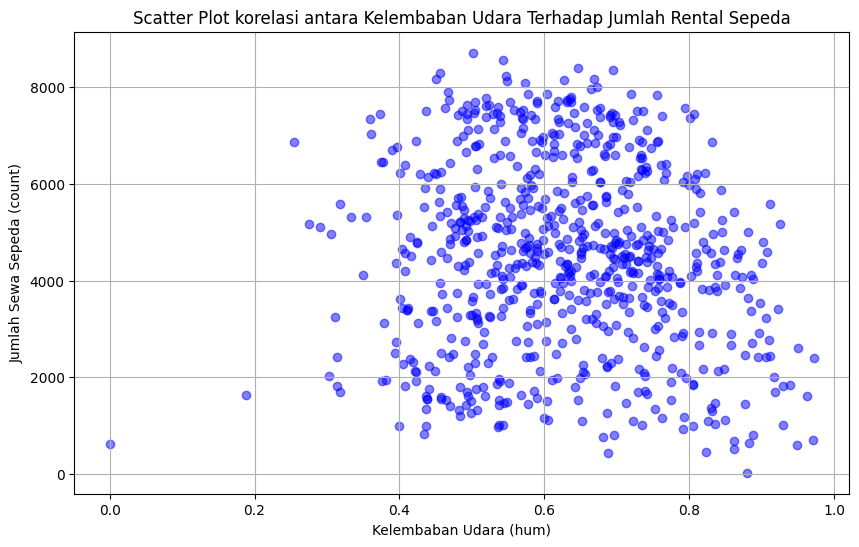

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_day_df['hum'], data_day_df['count'], color='blue', alpha=0.5)
plt.title('Scatter Plot korelasi antara Kelembaban Udara Terhadap Jumlah Rental Sepeda')
plt.xlabel('Kelembaban Udara (hum)')
plt.ylabel('Jumlah Sewa Sepeda (count)')
plt.grid(True)
plt.show()

**Menggunakan Heatmap**

In [ ]:
correlation_matrix = data_day_df[['temp', 'hum', 'count']].corr()

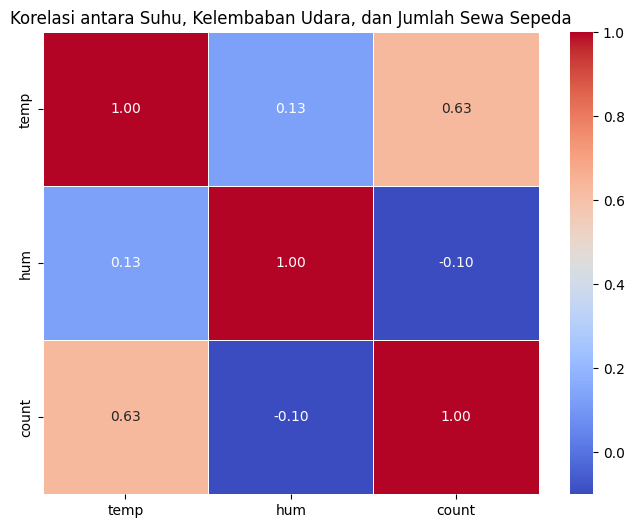

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasi antara Suhu, Kelembaban Udara, dan Jumlah Sewa Sepeda')
plt.show()

**Hasil Korelasi**

*   Korelasi antara "temp" dengan "count"



In [ ]:
correlation_temp_count = data_day_df['temp'].corr(data_day_df['count'])
print("Korelasi antara suhu (temp) dengan jumlah rental sepeda (count): ", correlation_temp_count)

Korelasi antara suhu (temp) dengan jumlah rental sepeda (count):  0.6274940090334918


*   Korelasi antara "hum" dengan "count"

In [ ]:
correlation_hum_count = data_day_df['hum'].corr(data_day_df['count'])
print("Korelasi antara kelembaban udara (hum) dengan jumlah sewa sepeda (count): ", correlation_hum_count)

Korelasi antara kelembaban udara (hum) dengan jumlah sewa sepeda (count):  -0.1006585621371552


### Pertanyaan 2: Apakah ada perbedaan dalam jumlah sewa sepeda antara hari kerja ("workingday") dan hari libur ("holiday")

**Pada saat Working day**

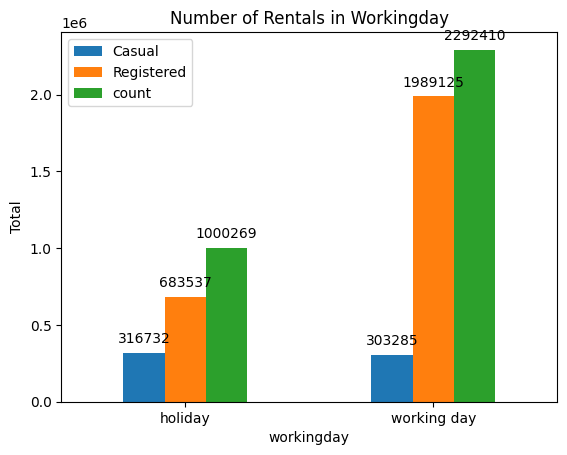

In [ ]:
workingday_rental = data_day_df[['workingday','casual','registered','count']].groupby(by='workingday').sum().reset_index()

ax = workingday_rental.plot(kind='bar', x='workingday', y=['casual', 'registered', 'count'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.xlabel('workingday')
plt.ylabel('Total')
plt.title('Number of Rentals in Workingday')
plt.xticks([1, 0], ['working day', 'holiday'], rotation=0)
plt.legend(['Casual', 'Registered', 'count'])
plt.show()

In [ ]:
data_day_df[['workingday','casual','registered','count']].groupby(by='workingday').sum().reset_index()

,workingday,casual,registered,count
0,0,316732,683537,1000269
1,1,303285,1989125,2292410


**Pada saat Holiday**

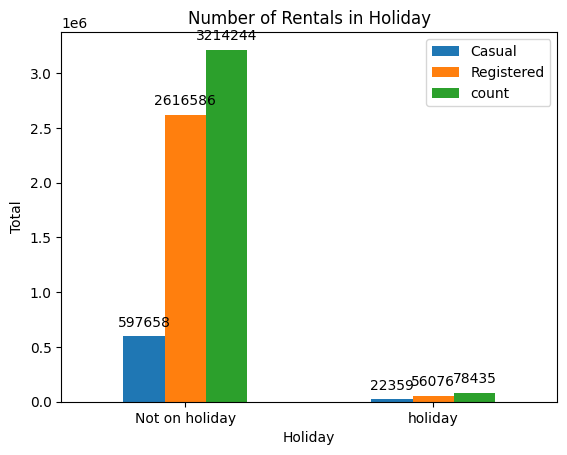

In [ ]:
holiday_rental = data_day_df[['holiday','casual','registered','count']].groupby(by='holiday').sum().reset_index()

ax = holiday_rental.plot(kind='bar', x='holiday', y=['casual', 'registered', 'count'])
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.xlabel('Holiday')
plt.ylabel('Total')
plt.title('Number of Rentals in Holiday')
plt.xticks([0, 1], ['Not on holiday', 'holiday'], rotation=0)
plt.legend(['Casual', 'Registered', 'count'])
plt.show()

In [ ]:
data_day_df[['holiday','casual','registered','count']].groupby(by='holiday').sum().reset_index()

,holiday,casual,registered,count
0,0,597658,2616586,3214244
1,1,22359,56076,78435


## Conclusion

- Conclution pertanyaan 1

- Dilihat dari hasil korelasi di peroleh bahwa temperatur sangat mempengaruhi
jumlah rental sepeda dengan nilai 0.62 sedangkan kelembaban udara memperoleh hasil -0.10 yang berarti kelembaban udara tidak mempengaruhi jumlah rental sepeda


- Conclution pertanyaan 2
- dilihat dari hasil yang diperoleh dapat di simpulkan bahwa jumlah rental sepeda mencapai 3.292.679. Rental sepeda paling banyak di lakukan saat working day dibandingkan pada saat holiday. Variabel yang banyak melakukan rental saat working day adalah register dengan total mencapai 1.989.125